In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
amazon=pd.read_csv('/content/drive/MyDrive/LLM/Amazon customer project/1429_1.csv')
amazon.head(2)

/tmp/ipython-input-3-3204462633.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon=pd.read_csv('/content/drive/MyDrive/LLM/Amazon customer project/1429_1.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [ ]:
amazon.shape

(34660, 21)

In [ ]:
amazon.isna().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               6
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            7
dtype: int64

In [4]:
amazon.drop(columns=['name','reviews.userCity','reviews.userProvince','reviews.id','reviews.didPurchase','reviews.dateAdded'],axis=1,inplace=True)

In [ ]:
amazon.isna().sum()

id                       0
asins                    2
brand                    0
categories               0
keys                     0
manufacturer             0
reviews.date            39
reviews.dateSeen         0
reviews.doRecommend    594
reviews.numHelpful     529
reviews.rating          33
reviews.sourceURLs       0
reviews.text             1
reviews.title            6
reviews.username         7
dtype: int64

In [6]:
amazon.dropna(inplace=True)

In [7]:
amazon.isna().sum()

,0
id,0
asins,0
brand,0
categories,0
keys,0
manufacturer,0
reviews.date,0
reviews.dateSeen,0
reviews.doRecommend,0
reviews.numHelpful,0


In [ ]:
amazon.shape

(34054, 15)

In [8]:
df=amazon[['reviews.title','reviews.text','reviews.rating']]
df.head(2)

,reviews.title,reviews.text,reviews.rating
0,Kindle,This product so far has not disappointed. My c...,5.0
1,very fast,great for beginner or experienced person. Boug...,5.0


In [ ]:
df['reviews.rating'].unique()

array([5., 4., 2., 1., 3.])

In [21]:
df['label']=(df['reviews.rating']>3.0).astype(int)

/tmp/ipython-input-21-1487405092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=(df['reviews.rating']>3.0).astype(int)


In [10]:
df

,reviews.title,reviews.text,reviews.rating,label
0,Kindle,This product so far has not disappointed. My c...,5.0,1
1,very fast,great for beginner or experienced person. Boug...,5.0,1
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,1
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,1
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,1
...,...,...,...,...
34620,Works great,I am now able to stream tv and movies from aro...,4.0,1
34621,the best,"best streaming device , very portable , amazin...",5.0,1
34622,Love it,Simply the best to watch tv series and movies....,5.0,1
34623,"Try it, you will like it",I was looking for ways to cut cost from a rais...,4.0,1


In [ ]:
df['reviews.rating'].value_counts()

reviews.rating
5.0    23380
4.0     8467
3.0     1470
2.0      381
1.0      356
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_19088\1134359379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ratings,palette='Oranges')


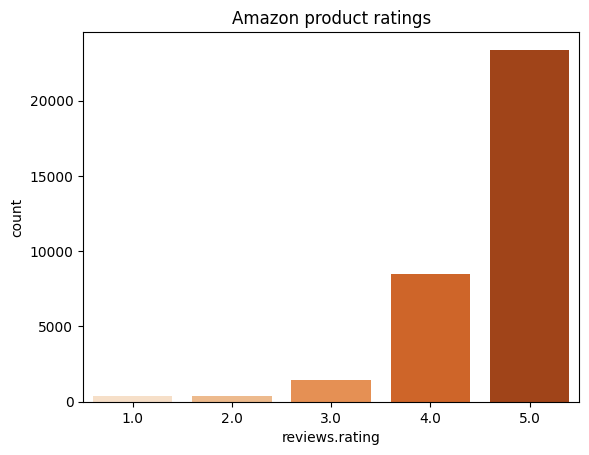

In [ ]:
# EDA
ratings=df['reviews.rating'].value_counts()
sns.barplot(ratings,palette='Oranges')
plt.title('Amazon product ratings')
plt.show()

In [11]:
# preprocessing the amazon text
stopwords_list=stopwords.words('english')
stopwords_list.remove('not')

In [12]:
wnet=WordNetLemmatizer()

In [13]:
def preprocessing(text):
    lower=text.lower()
    specia_words=re.sub(r'[^a-z\s]','',lower)
    tokens=word_tokenize(specia_words)
    cleaned=[wnet.lemmatize(i,pos='v') for i in tokens if i not in stopwords_list]
    return ' '.join(cleaned)

In [14]:
df['cleaned_text']=df['reviews.text'].apply(preprocessing)

/tmp/ipython-input-14-718868800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text']=df['reviews.text'].apply(preprocessing)


In [17]:
df.head(3)

,reviews.title,reviews.text,reviews.rating,label,cleaned_text
0,Kindle,This product so far has not disappointed. My c...,5.0,1,product far not disappoint children love use l...
1,very fast,great for beginner or experienced person. Boug...,5.0,1,great beginner experience person buy gift love
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,1,inexpensive tablet use learn step nabi thrill ...


In [ ]:
# lets apply tfidf vectorizer to get the word frequency and rare words
tfidf=TfidfVectorizer()
vectorised=tfidf.fit_transform(df['cleaned_text'])

In [ ]:
# import the pipeline
from sklearn.pipeline import Pipeline

In [ ]:
multino_pipe=Pipeline([('vectorizer',TfidfVectorizer()),('model',MultinomialNB())])

In [ ]:
x=df['cleaned_text']
y=df['label']

In [ ]:
# split the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [ ]:
# lets train the pipeline
multino_pipe.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('model', MultinomialNB())])

In [ ]:
# lets predict the data
prediction=multino_pipe.predict(x_test)

In [ ]:
# lets check the accuracy of the model
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.94      1.00      0.97      6370

    accuracy                           0.94      6811
   macro avg       0.47      0.50      0.48      6811
weighted avg       0.87      0.94      0.90      6811



C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
confusion_matrix(y_test,prediction)

array([[   0,  441],
       [   0, 6370]], dtype=int64)

In [ ]:
print(df['label'].value_counts())

label
1    31847
0     2207
Name: count, dtype: int64


In [ ]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
# from above analysis data is imbalance. so to resolve that smote plays a role

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote=SMOTE()
x_resam,y_resam=smote.fit_resample(vectorised,y)

In [ ]:
multinomial=MultinomialNB()

In [ ]:
# split the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x_resam,y_resam,test_size=0.2,random_state=32)

In [ ]:
multinomial.fit(x_train,y_train)

MultinomialNB()

In [ ]:
pred=multinomial.predict(x_test)

In [ ]:
confusion_matrix(y_test,pred)

array([[5722,  623],
       [ 994, 5400]], dtype=int64)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6345
           1       0.90      0.84      0.87      6394

    accuracy                           0.87     12739
   macro avg       0.87      0.87      0.87     12739
weighted avg       0.87      0.87      0.87     12739



In [ ]:
From the above analysis before and after applying the smote. There is a huge differnce in the accuracy. As before smote there is no TN .Only the TP is highly
dominated. But after applying the smoter prediction got balance.

# NER-named entity recognition

In [2]:
pip install Spacy

In [4]:
import spacy

In [23]:
nlp=spacy.load('en_core_web_sm')

In [55]:
text=df['reviews.text'][100]
text


'I purchased 2 of these tablets for my 6 and 8 year old. They were a Black Friday special for $59. They are perfect for the apps and games they wanted.'

In [56]:
doc=nlp(text)


In [57]:
for ent in doc.ents:
  print(f'{ent.text}--{ent.label_}')

2--CARDINAL
6 and 8 year old--DATE
Black Friday--EVENT
59--MONEY


In [41]:
text = "I bought a phone from Samsung last week. It was delivered to Bangalore."
doc = nlp(text)

for ent in doc.ents:
    print(f'{ent.text} -- {ent.label_}')


Samsung -- ORG
last week -- DATE
Bangalore -- PERSON


In [ ]:
#Apply deeplearning models in nlp

In [ ]:
#need to preprocess the data.

In [15]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [39]:
# import the models
from gensim.models import Word2Vec,FastText

In [40]:
words=[word_tokenize(w) for w in (df['cleaned_text'])]

In [22]:
words

[['product',
  'far',
  'not',
  'disappoint',
  'children',
  'love',
  'use',
  'like',
  'ability',
  'monitor',
  'control',
  'content',
  'see',
  'ease'],
 ['great', 'beginner', 'experience', 'person', 'buy', 'gift', 'love'],
 ['inexpensive',
  'tablet',
  'use',
  'learn',
  'step',
  'nabi',
  'thrill',
  'learn',
  'skype',
  'already'],
 ['ive',
  'fire',
  'hd',
  'two',
  'weeks',
  'love',
  'tablet',
  'great',
  'valuewe',
  'prime',
  'members',
  'tablet',
  'shin',
  'love',
  'able',
  'easily',
  'access',
  'prime',
  'content',
  'well',
  'movies',
  'download',
  'watch',
  'laterthis',
  'screen',
  'really',
  'nice',
  'look',
  'nice',
  'crisp',
  'bright',
  'infact',
  'brighter',
  'ipad',
  'pro',
  'cost',
  'base',
  'model',
  'build',
  'fire',
  'insanely',
  'awesome',
  'run',
  'mm',
  'thick',
  'smooth',
  'glossy',
  'feel',
  'back',
  'really',
  'amaze',
  'hold',
  'like',
  'futuristic',
  'tab',
  'ur',
  'hand'],
 ['buy',
  'grand',
 

In [41]:
model1=Word2Vec(words,vector_size=10,window=3)

In [26]:
model1.wv.most_similar('sad')

[('nervous', 0.9848034381866455),
 ('bn', 0.9843237400054932),
 ('expire', 0.9800594449043274),
 ('verify', 0.9792792201042175),
 ('kindlefire', 0.9770227670669556),
 ('hype', 0.9755241274833679),
 ('insurance', 0.974834144115448),
 ('cry', 0.9741929173469543),
 ('felt', 0.9718576669692993),
 ('likely', 0.9710791707038879)]

In [42]:
model2=Word2Vec(words,vector_size=10,window=3,sg=1)

In [28]:
model2.wv.most_similar('sad')

[('defect', 0.9910208582878113),
 ('receipt', 0.9863767027854919),
 ('upset', 0.9842818379402161),
 ('rarely', 0.9759728312492371),
 ('carousel', 0.9729384183883667),
 ('century', 0.971104085445404),
 ('shoot', 0.9710562825202942),
 ('admit', 0.9707663059234619),
 ('yesterday', 0.9692286252975464),
 ('overheat', 0.968829870223999)]

In [43]:
model3=FastText(words,vector_size=10)

In [30]:
model2.wv.most_similar('sad')

[('defect', 0.9910208582878113),
 ('receipt', 0.9863767027854919),
 ('upset', 0.9842818379402161),
 ('rarely', 0.9759728312492371),
 ('carousel', 0.9729384183883667),
 ('century', 0.971104085445404),
 ('shoot', 0.9710562825202942),
 ('admit', 0.9707663059234619),
 ('yesterday', 0.9692286252975464),
 ('overheat', 0.968829870223999)]

In [19]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [22]:
# preprocessing the data
tokenize=Tokenizer(num_words=10000)
tokenize.fit_on_texts(df['cleaned_text'])
sequences=tokenize.texts_to_sequences(df['cleaned_text'])
x=pad_sequences(sequences,maxlen=100)
y=df['label'].values

In [69]:
word_index=tokenize.word_index
vocabu_size=len(word_index)+1
vocabu_size

14370

In [25]:
x

array([[   0,    0,    0, ...,  232,  145,  315],
       [   0,    0,    0, ...,    5,   38,    3],
       [   0,    0,    0, ...,   96, 1377,  226],
       ...,
       [   0,    0,    0, ...,   81,  113, 2753],
       [   0,    0,    0, ..., 1462,  632,    3],
       [   0,    0,    0, ...,  114,  125,  389]], dtype=int32)

In [26]:
x.shape,y.shape

((34054, 100), (34054,))

In [27]:
#Build the neural network
model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=128,))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid',))

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [65]:
x_train

array([[  0,   0,   0, ...,  71, 662, 609],
       [  0,   0,   0, ..., 228,   6,  13],
       [  0,   0,   0, ...,   3,   1,  38],
       ...,
       [  0,   0,   0, ..., 956, 105, 216],
       [ 12,  17,   4, ...,   8,  58, 134],
       [  0,   0,   0, ...,  10, 392, 951]], dtype=int32)

In [66]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
print(x_train.shape)  # e.g., (27243, 100)
print(y_train.shape)  # should be (27243,)


(27243, 100)
(27243,)


In [29]:
history=model.fit(x,y,epochs=3,verbose=1)

Epoch 1/3
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 95s 85ms/step - accuracy: 0.9324 - loss: 0.2268
Epoch 2/3
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 141s 84ms/step - accuracy: 0.9519 - loss: 0.1377
Epoch 3/3
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 141s 84ms/step - accuracy: 0.9610 - loss: 0.1163


In [30]:
accuracy=history.history['accuracy']
loss=history.history['loss']

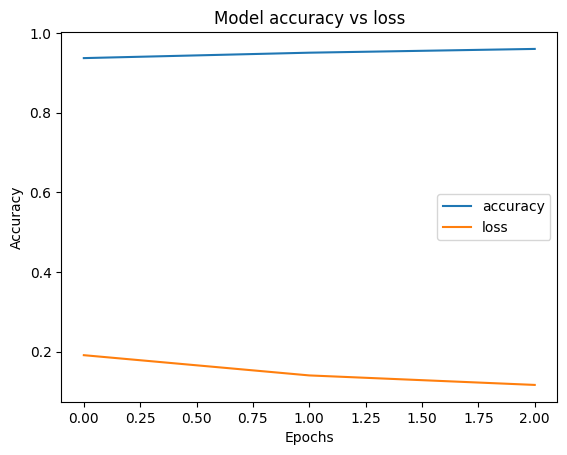

In [31]:
plt.plot(accuracy,label='accuracy')
plt.plot(loss,label='loss')
plt.title('Model accuracy vs loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [70]:
# feeding dense vectors as input to the rnn.Need to create embedding matrix

embedding_dims=10     #give vector size
embedding_matrix=np.zeros((vocabu_size,embedding_dims))
embedding_matrix.shape

(14370, 10)

In [71]:
for word,i in word_index.items():
  if word in model1.wv:
    embedding_matrix[i]=model1.wv[word]



In [87]:
vocabu_size

14370

In [88]:
embedding_dims

10

In [90]:
embedd_model=Sequential()
embedd_model.add(Embedding(input_dim=vocabu_size,output_dim=embedding_dims,
                    weights=[embedding_matrix],
                     trainable=False))
embedd_model.add(LSTM(64))
embedd_model.add(Dense(1,activation='sigmoid'))


In [91]:
embedd_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
x

array([[   0,    0,    0, ...,  232,  145,  315],
       [   0,    0,    0, ...,    5,   38,    3],
       [   0,    0,    0, ...,   96, 1377,  226],
       ...,
       [   0,    0,    0, ...,   81,  113, 2753],
       [   0,    0,    0, ..., 1462,  632,    3],
       [   0,    0,    0, ...,  114,  125,  389]], dtype=int32)

In [80]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [93]:
embedd_model.fit(x,y,validation_split=0.2,epochs=3)

Epoch 1/3
852/852 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9350 - loss: 0.1991 - val_accuracy: 0.9511 - val_loss: 0.2216
Epoch 2/3
852/852 ━━━━━━━━━━━━━━━━━━━━ 79s 52ms/step - accuracy: 0.9328 - loss: 0.1936 - val_accuracy: 0.9395 - val_loss: 0.2101
Epoch 3/3
852/852 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9328 - loss: 0.1919 - val_accuracy: 0.9395 - val_loss: 0.1967


In [ ]:
From the above analysis with and without word2vec model to the Rnn. There is a difference in the accuracy.